<a href="https://colab.research.google.com/github/kimgoinghard/study-machine-learning/blob/main/study_torch_14_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml #사이킷런에 내장된  mnist 데이터셋 

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
mnist.data = np.array(mnist.data)

In [9]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [143]:
mnist.target = mnist.target.astype(np.int8)

In [144]:
X = mnist.data / 255 # 0에서 1사이 값으로 정규화
y = mnist.target

In [145]:
X[0].shape

(784,)

이 이미지의 레이블은 :  5


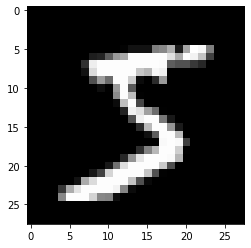

In [146]:
plt.imshow(X[0].reshape(28,28), cmap = 'gray') #784차원 데이터를 .reshape하여 차원변경
print('이 이미지의 레이블은 : ' ,y[0]) #레이블은 5

In [147]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/7, random_state=0) #테스트와 훈련세트 분리시켜주기
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(np.array(y_test))


In [149]:
y_train.shape

torch.Size([60000])

In [103]:
y_test.shape

tensor([0., 4., 1.,  ..., 1., 3., 0.])

In [150]:
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

In [151]:
#dataloader : dataset을 batch기반의 딥러닝 학습시 batch단위로 slicing하여 전달하는 역할을 한다.
loader_train = DataLoader(ds_train, batch_size = 64, shuffle = True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle = False)

In [152]:
#multi perceptron
from torch import nn
model = nn.Sequential() #모델객체 생성
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2' , nn.ReLU())
model.add_module('fc3', nn.Linear(100,10))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [153]:
from torch import optim

#손실함수설정
loss_fn = nn.CrossEntropyLoss()
#최적화 기법 설정
optimizer = optim.Adam(model.parameters(), lr =0.01)

In [154]:
def train(epoch):
  model.train() #학습모드로 변경

  for data, targets in loader_train:
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()
  print('epoch : {0}, 학습완료'.format(epoch))

In [155]:
def test():
  model.eval() #추론모드로 변경
  correct=0

  with torch.no_grad():
    for data, targets in loader_test:
      outputs = model(data)
      _ , predicted = torch.max(outputs.data, 1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum() #이해가 필요한부분이다. 
    data_num = len(loader_test.dataset)
    accuracy = correct / data_num * 100
    print('테스트 데이터 예측 정확도 : {0:.2f}%'.format(accuracy))


In [134]:
test()

테스트 데이터 예측 정확도 : 10.98%


In [156]:
for epoch in range(5):
  train(epoch)

test()

epoch : 0, 학습완료
epoch : 1, 학습완료
epoch : 2, 학습완료
epoch : 3, 학습완료
epoch : 4, 학습완료
테스트 데이터 예측 정확도 : 96.22%


In [161]:
ind = 2018
model.eval()
data = X_test[ind]
output = model(data)
_ , predicted = torch.max(output.data, 0) #확률이 가장 높은 레이블이 무엇인지 계산

print('예측 결과 : ', predicted)


예측 결과 :  tensor(2)


예측 결과 : 2


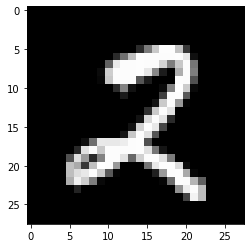

정답 레이블은 : 2


In [177]:
X_test_show = X_test[ind].numpy()
print('예측 결과 : {0}'.format(predicted))
plt.imshow(X_test_show.reshape(28,28), cmap = 'gray')
plt.show()
print('정답 레이블은 : {0}'.format(y_test[ind]))